# Simple Helmholtz equation
=========================

Let's start by considering the modified Helmholtz equation on a unit square,
$\Omega$, with boundary $\Gamma$:
$$-\nabla^2 u + u = f $$
$$\nabla u \cdot \vec{n} = 0 \quad on\ \Gamma$$
for some known function $f$. The solution to this equation will be some function $u\in V$, for some suitable function space $V$, that satisfies these equations.
Note that this is the Helmholtz equation that appears in meteorology, rather than the indefinite Helmholtz equation $\nabla^2 u + u = f$ that arises in wave problems.

We transform the equation into weak form by multiplying by an arbitrary test function in $V$, integrating over the domain and then integrating by parts.
 The variational problem so derived reads: find
$u \in V$ such that:
$$
   \require{cancel}
   \int_\Omega \nabla u\cdot\nabla v  + uv\ \mathrm{d}x = \int_\Omega
   vf\ \mathrm{d}x + \cancel{\int_\Gamma v \nabla u \cdot \vec{n} \mathrm{d}s}
$$
Note that the boundary condition has been enforced weakly by removing the surface term resulting from the integration by parts.

We can choose the function $f$, so we take:
$$
   f = (1.0 + 8.0\pi^2)\cos(2\pi x)\cos(2\pi y)
$$
which conveniently yields the analytic solution:
$$
   u = \cos(2\pi x)\cos(2\pi y)
$$
However we wish to employ this as an example for the finite element method, so lets go ahead and produce a numerical solution.

First, we always need a mesh. Let's have a $10 \times 10$ element unit square:

In [13]:
from firedrake import *
mesh = UnitSquareMesh(10, 10)

We need to decide on the function space in which we'd like to solve the problem. Let's use piecewise linear functions continuous between elements:

In [14]:
V = FunctionSpace(mesh, "CG", 1)

We'll also need the test and trial functions corresponding to this function space:

In [15]:
u = TrialFunction(V)
v = TestFunction(V)

We declare a function over our function space and give it the
value of our right hand side function::

In [16]:
f = Function(V)
x, y = SpatialCoordinate(mesh)
f.interpolate((1+8*pi*pi)*cos(x*pi*2)*cos(y*pi*2))

Coefficient(WithGeometry(FunctionSpace(<firedrake.mesh.MeshTopology object at 0x16c650890>, FiniteElement('Lagrange', triangle, 1), name=None), Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 37)), 76)

We can now define the bilinear and linear forms for the left and right
hand sides of our equation respectively::

In [17]:
a = (inner(grad(u), grad(v)) + inner(u, v)) * dx
L = inner(f, v) * dx

Finally we solve the equation. We redefine `u` to be a function
holding the solution::

In [18]:
u = Function(V)

Since we know that the Helmholtz equation is
symmetric, we instruct PETSc to employ the conjugate gradient method
and do not worry about preconditioning for the purposes of this demo

In [23]:
solve(a == L, u, solver_parameters={'ksp_type': 'cg', 'pc_type': 'none'})

For more details on how to specify solver parameters, see the section of the manual on :doc:`solving PDEs <../solving-interface>`.
Next, we might want to look at the result, so we output our solution to a file:

In [24]:
File("../assets/helmholtz.pvd").write(u)

This file can be visualised using [paraview](http://www.paraview.org/).

We could use the built-in plotting functions of firedrake by calling :func:`tripcolor <firedrake.plot.tripcolor>` to make a pseudo-color plot.
Before that, matplotlib.pyplot should be installed and imported

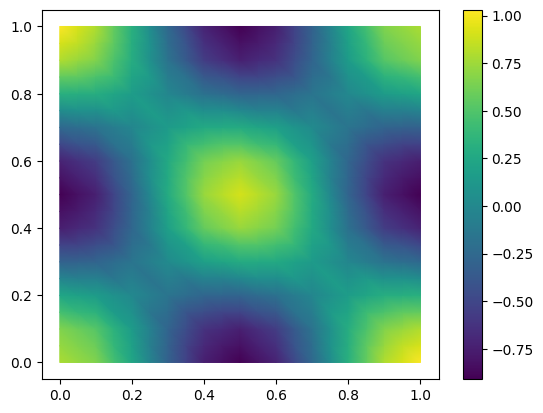

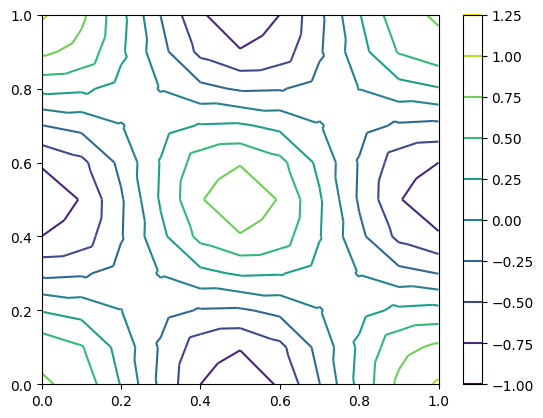

In [25]:
try:
    import matplotlib.pyplot as plt
except:
    warning("Matplotlib not imported")

try:
    fig, axes = plt.subplots()
    colors = tripcolor(u, axes=axes)
    fig.colorbar(colors)
except Exception as e:
    warning("Cannot plot figure. Error msg: '%s'" % e)

# The plotting functions in Firedrake mimic those of matplotlib; to produce a
# contour plot instead of a pseudocolor plot, we can call
# :func:`tricontour <firedrake.plot.tricontour>` instead::

try:
    fig, axes = plt.subplots()
    contours = tricontour(u, axes=axes)
    fig.colorbar(contours)
except Exception as e:
    warning("Cannot plot figure. Error msg: '%s'" % e)

# Don't forget to show the image::
try:
    plt.show()
except Exception as e:
    warning("Cannot show figure. Error msg: '%s'" % e)

Alternatively, since we have an analytic solution, we can check the $L^2$ norm of the error in the solution::

In [26]:
f.interpolate(cos(x*pi*2)*cos(y*pi*2))
print(sqrt(assemble(dot(u - f, u - f) * dx)))

0.06257073783339048
